In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importando os dados
df = pd.read_csv('/content/telco_churn.csv') # importante colocar o caminho onde o dataset vai estar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Explicando as variáveis:**\
*customerID:* | ID do cliente;<br>
*gender:* | Se o cliente é homem ou mulher;<br>
*SeniorCitizen:* | Se o cliente é um cidadão sênior ou não (idoso); <br>
*Partner:* | Se o cliente possui ou não um parceiro(a);<br>
*Dependents:* | Se o cliente possui ou não dependentes;<br>
*tenure:* | Número de meses que o cliente ficou na empresa;<br>
*PhoneService:* | Se o cliente tem ou não um serviço de telefone;   
*MultipleLines:* | Se o cliente tem multiplas linhas ou não;    
*InternetService:* | Se o provedor de internet do cliente é do tipo DLS, Fiber optic ou 'No';    
*OnlineSecurity:* | Se o cliente tem serviço de segurança online ou não;
*OnlineBackup:* |  Se o cliente tem ou não serviço de backup online;    
*DeviceProtection:* | Se o cliente tem ou não serviço de proteçao de dispositivos; <br>
*TechSupport:* | Se o cliente tem ou ou não suporte tecnico;      
*StreamingTV:* | Se o cliente tem ou não serviço de StreamingTV;      
*StreamingMovies:* |  Se o cliente tem ou não serviço de Streaming de filmes;  
*Contract:* | Tipo do contrato do cliente (mês-a-mês, um ano, dois anos);       
*PaperlessBilling:* |  Se o faturamento do cliente é sem papel ou não;
*PaymentMethod:* | Método de pagamento do cliente;    
*MonthlyCharges:* | O valor cobrado mensalmente ao cliente;   
*TotalCharges:* | O valor total cobrado do cliente;     
*Churn:* | **TARGET** | Se o cliente efetuou o cancelamento ou não.


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.shape

(7043, 21)

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Removendo a coluna 'customerID'
df.drop('customerID', axis=1, inplace=True)

In [7]:
# Corrigindo tipo de dados da coluna totalcharges
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

**Verificando os dados atraves de gráficos**

**Análise Univariada**

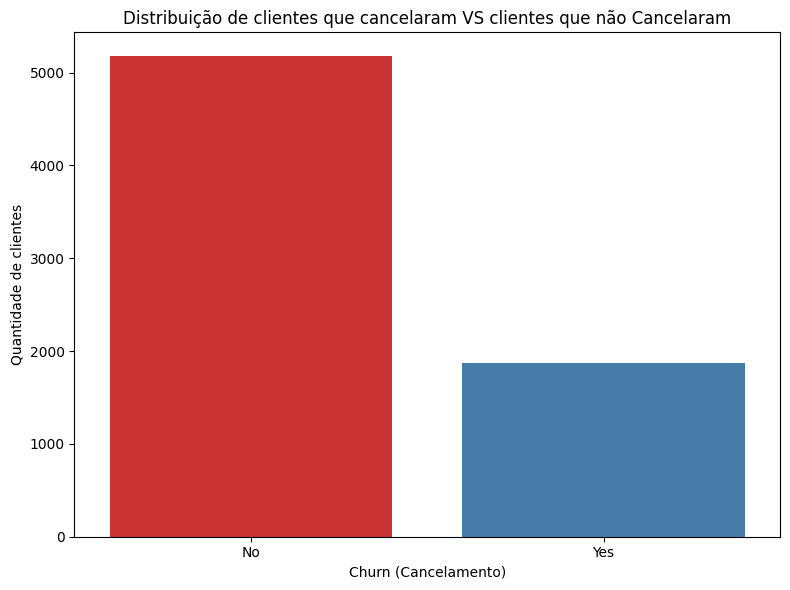

In [8]:
# Distribuição de clientes que cancelaram VS clientes que não Cancelaram
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=df, palette='Set1')

plt.title('Distribuição de clientes que cancelaram VS clientes que não Cancelaram')
plt.xlabel('Churn (Cancelamento)')
plt.ylabel('Quantidade de clientes')
plt.tight_layout()
plt.show()

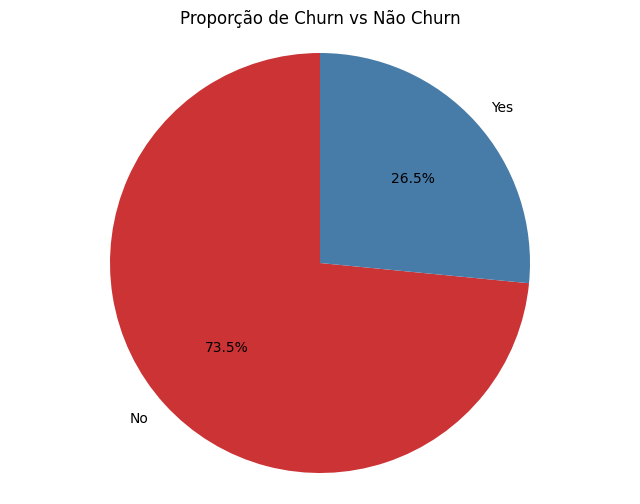

In [9]:
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['#CB3335', '#477CA8']

#plotando a figura

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporção de Churn vs Não Churn')
plt.axis('equal')
plt.show()

💡 Insight : Em sua maioria, neste dataset, apenas 26.5% de seus clientes efetuaram o cancelamento. Os outros 73.5% mantiveram com seus planos ativos

**Análises Bivariadas**

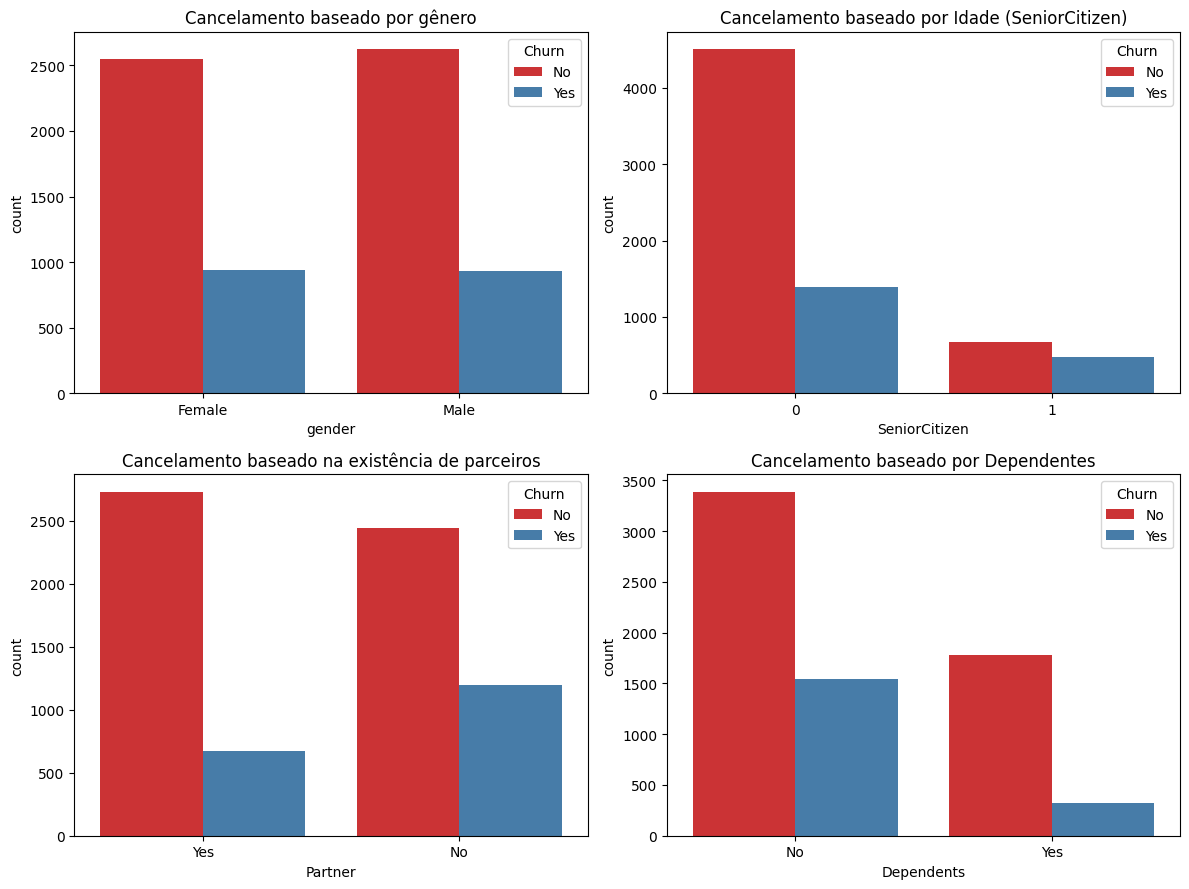

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

sns.countplot(data=df, x='gender', hue='Churn',ax=ax[0,0],palette='Set1')
ax[0,0].set_title(f'Cancelamento baseado por gênero')
sns.countplot(data=df, x='SeniorCitizen', hue='Churn',ax=ax[0,1],palette='Set1')
ax[0,1].set_title(f'Cancelamento baseado por Idade (SeniorCitizen)')
sns.countplot(data=df, x='Partner', hue='Churn',ax=ax[1,0],palette='Set1')
ax[1,0].set_title(f'Cancelamento baseado na existência de parceiros')
sns.countplot(data=df, x='Dependents', hue='Churn',ax=ax[1,1],palette='Set1')
ax[1,1].set_title(f'Cancelamento baseado por Dependentes')

plt.tight_layout()
plt.show()


**💡 Insight :**\
**Cancelamento baseado por gênero:** <br> No primeiro Gráfico é possivel perceber que o gênero não tem muita relevancia em determinar se um cliente vai cancelar ou nao, uma vez que os números são bem proximos de clientes de ambos os sexos e seus cancelamentos. <p>
**Cancelamento baseado na existência de parceiros:**<br> Esse já foi um gráfico mais relante, podendo tirar como primeiras impressoes que pessoas que não possuem parceiros têm uma tendência maior em realizar cancelamentos. <p>
**Cancelamento baseado por idade:**<br> Vemos que nesse Dataset existe uma quantidade bem diferente de idosos e não idosos. Analisando por proporções a maioria dos idosos acabam realizando cancelamentos, enquanto a parte mais jovem dos clientes mesmo em número tendo mais cancelamento a sua proporção é muito inferior, logo é mais provavel que um idoso efetue o cancelamento. <p>
**Cancelamento por dependentes:**<br> De acordo com o gráfico, podemos determinar que os clientes que possuem dependentes realizam mais cancelamentos que as pessoas que não possuem dependentes.

In [11]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure']+ 1)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,72], labels=[0,1,2,3,4])

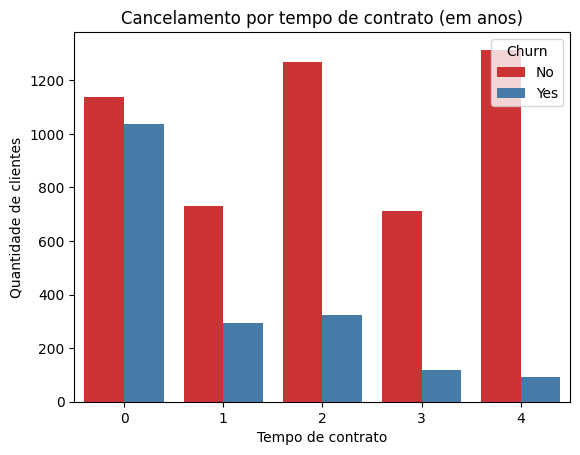

In [12]:
sns.countplot(x='tenure_group', hue='Churn', data=df, palette='Set1')
plt.title("Cancelamento por tempo de contrato (em anos)")
plt.xlabel("Tempo de contrato")
plt.ylabel("Quantidade de clientes")
plt.show()

**💡 Insight :**\
Pelo gráfico podemos observar que os clientes novos possuem uma taxa de cancelamento muito alta. Tambem mostra um padrão que quando mais meses um cliente fica na empresa menor é a taxa de cancelamento do mesmo.

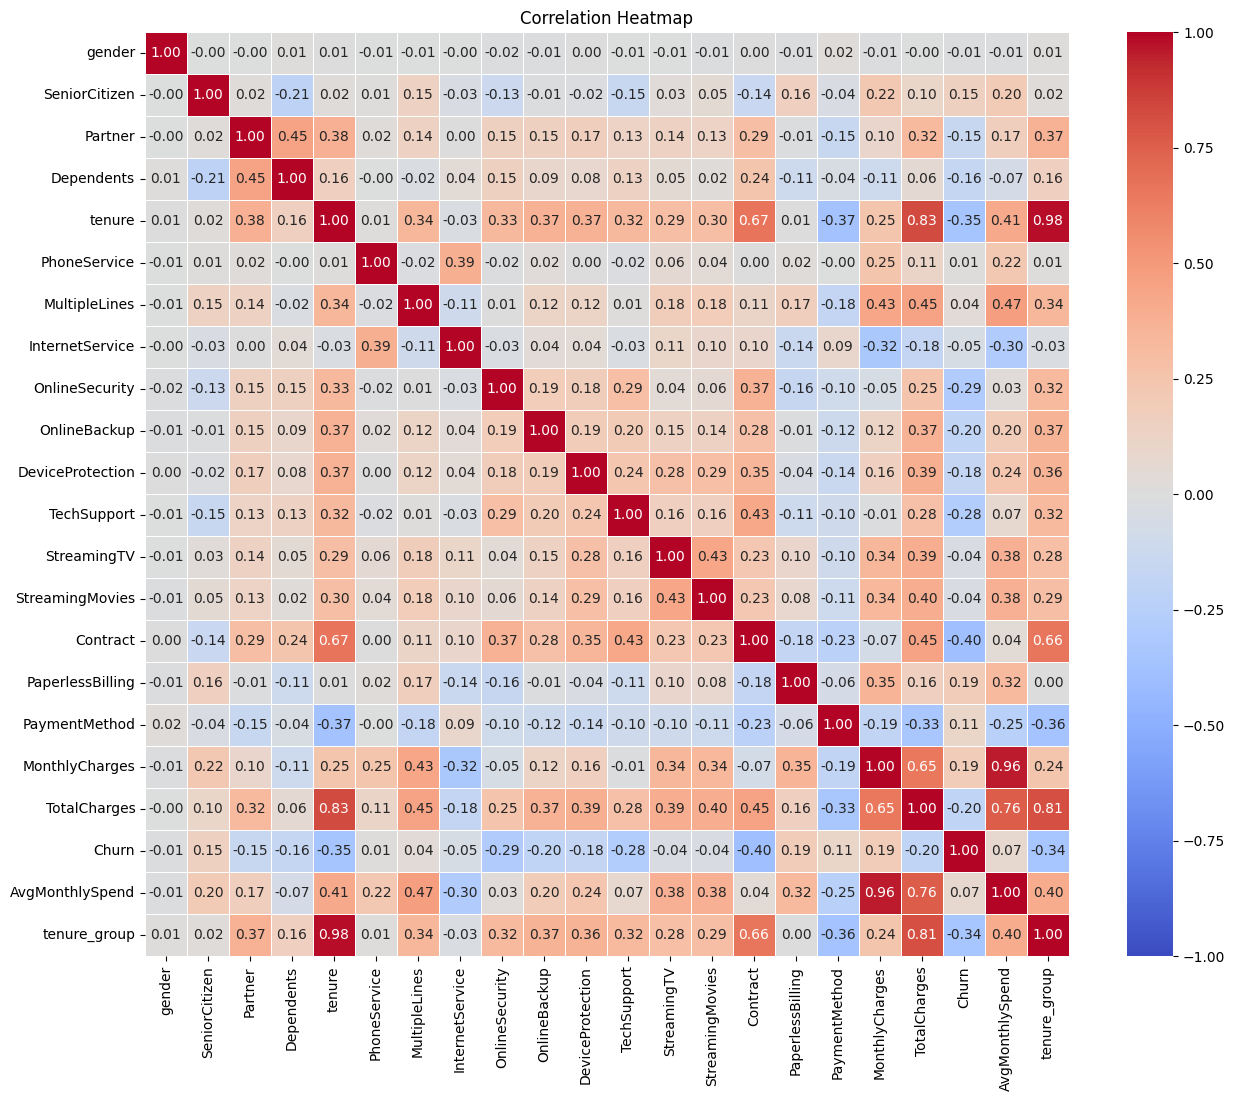

In [13]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="coolwarm", vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5 )
plt.title("Correlation Heatmap")
plt.show()

**Duração da assinatura e padrões de gastos**

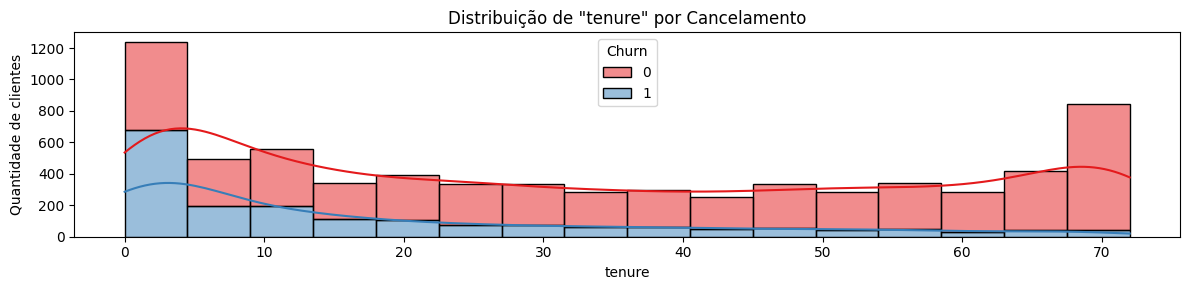

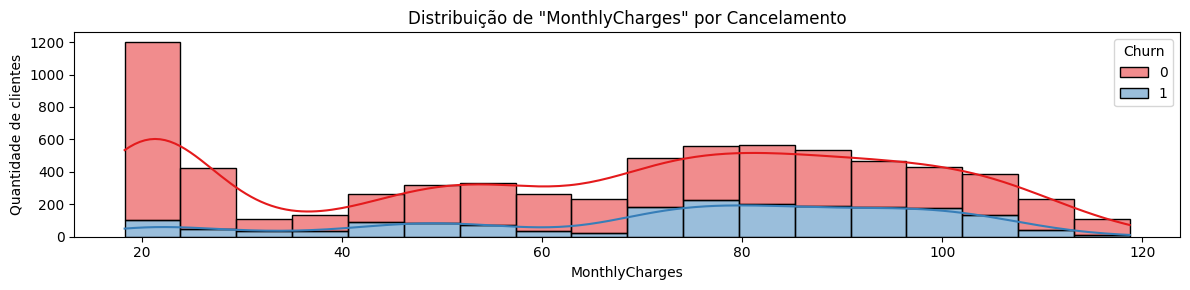

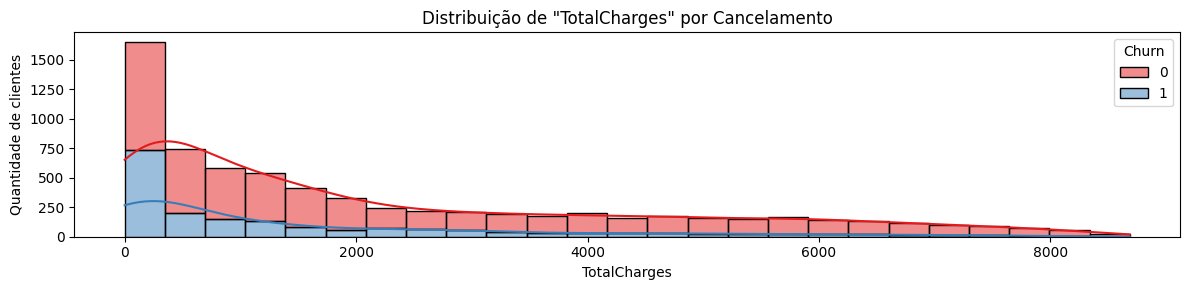

In [14]:
var_num = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in var_num:
    plt.figure(figsize=(12, 3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple='stack', palette='Set1')
    plt.title(f'Distribuição de "{col}" por Cancelamento')
    plt.ylabel("Quantidade de clientes")
    plt.tight_layout()
    plt.show()

**💡 Insight :**

>* A maior parte do cancelamento de clientes ocorre no início de uma assinatura, sendo a parte crítica bem nos primeiros meses. Já os clientes com mais de 30 meses tendem a se fidelizar resultando em um número menor de cancelamentos. Com isso podemos dizer que para a empresa o mais difícil são os primeiros meses que será necessário conquistar os clientes para fidelizar.

>* Analisando o gasto mensal, pode-se dizer que os clientes que gastam na faixa de  80 a 100 Dólares possuem uma taxa de cancelamento maior do que as pessoas que pagam menos.

>* Como a maioria dos cancelamentos acontecem nos primeiros meses, o ultimo gráfico mostrando o total de gastos nos mostra exatamente isso. A maior taxa de cancelamento está nos clientes que ainda nao gastaram quase nada na empresa, e os clientes que fidelizam continuam com os contratos, contribuindo assim para um faturamento maior.

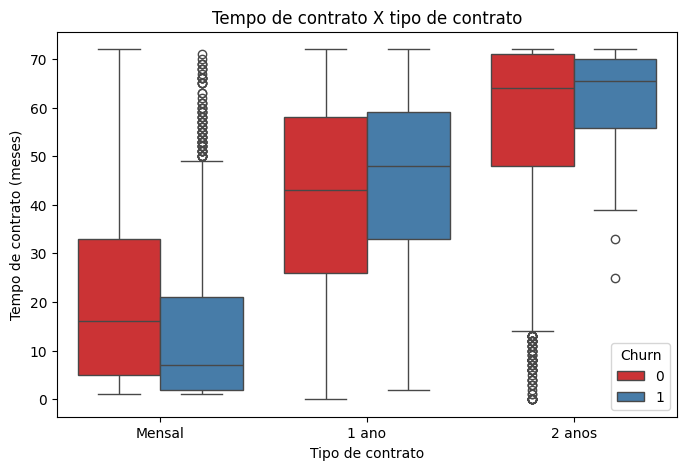

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Contract', y='tenure', hue='Churn', palette='Set1', data=df)
plt.title('Tempo de contrato X tipo de contrato')
novos_xticks = [0, 1, 2]
novos_rotulos = ['Mensal', '1 ano', '2 anos']
plt.xticks(novos_xticks, novos_rotulos)
plt.xlabel("Tipo de contrato")
plt.ylabel("Tempo de contrato (meses)")

plt.show()


**💡 Insight :**

>* Como observado em outros gráficos anteriormente, os clientes com contrato mensal tendem a ter um tempo menor de contrato, uma vez que esses clientes efetuam o cancelamento logo nos primieros meses.

📌 Temos a presença de alguns dados que saem fora do padrão (Outliers), referente a pessoas que possuem assinatura mensal e mesmo assim possuem um tempo de contrato superior a 4 anos.

>* No contrato de 1 ano e 2 anos temos uma maior parcela dos clientes com um tempo de contrato maior, como já observamos que quando maior o tempo do cliente na empresa, mais dificil é para ele efetuar o cancelamento.

📌 Também temos a presença de outliers nos contratos de 2 anos, no qual clientes estão cancelando os contratos antecipadamente antes do periodo do contrato finalizar, mostrando um tipo de insatisfaçao com a empresa e a recisão com a empresa antes do prazo.

In [16]:
#verificando a quantidade de cancelamento por tipo e duraçao de contrato
pd.crosstab(df['tenure_group'], [df['Churn'], df['Contract']])

Churn           0               1        
Contract        0    1    2     0   1   2
tenure_group                             
0             970  110   58  1024  13   0
1             459  181   90   278  16   0
2             538  463  268   264  55   6
3             169  277  266    65  44  11
4              84  275  955    24  38  31

**💡 Insight :**
>* Trazendo as informações dos gráficos em números, é possivel confirmar que a maior parte dos cancelamentos do clientes são realizadas logo no primeiro ano de contrato, sendo o tipo de contrato mensal (1024 cancelamentos). O tipo de contrato mensal segue com a maior taxa de cancelamento ate o terceiro ano que a pessoa está com a empresa, sendo (278 cancelamentos no segundo ano e 264 cancelamentos no 3 ano).

**Modelagem**

In [17]:
df.drop('tenure_group', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [19]:
X = df.drop('Churn', axis=1)  # Variaveis explicativas
y = df['Churn']               # Target

In [20]:
print(y.value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [21]:
# Separando as bases em treino e teste

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, stratify=y, random_state=42)

#oversampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
print(f'Número de componentes PCA: {X_train_pca.shape[1]}')


Número de componentes PCA: 16


In [23]:
#Escolhendo os modelos
models = {
    "Logistic Regression": LogisticRegression(
        C=1.0,
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42
    ),
    "SVM (RBF Kernel)": SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        class_weight='balanced',
        random_state=42
    )}


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      4139
           1       0.77      0.83      0.80      4139

    accuracy                           0.79      8278
   macro avg       0.79      0.79      0.79      8278
weighted avg       0.79      0.79      0.79      8278



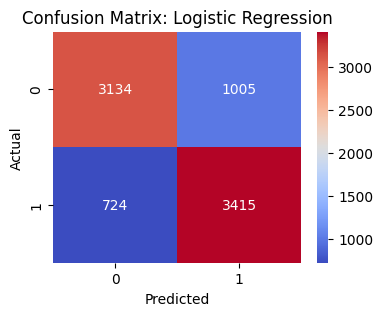


Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4139
           1       0.81      0.83      0.82      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



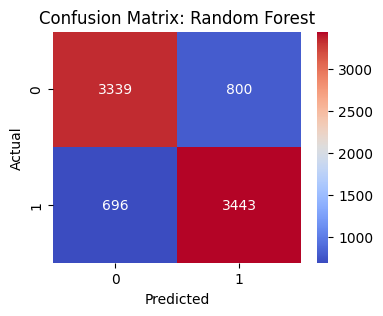


Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      4139
           1       0.76      0.80      0.78      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278



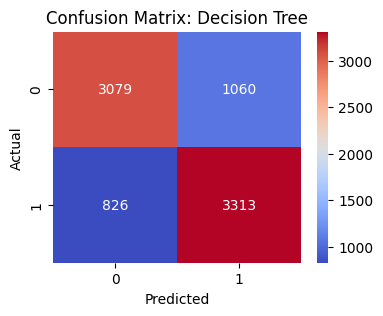


SVM (RBF Kernel)
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4139
           1       0.80      0.83      0.82      4139

    accuracy                           0.81      8278
   macro avg       0.81      0.81      0.81      8278
weighted avg       0.81      0.81      0.81      8278



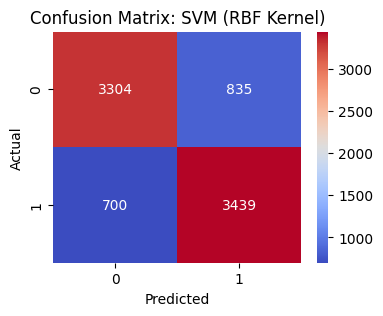


Resultados da avaliação baseada em modelo de validação cruzada:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Random Forest  0.819281   0.811593  0.831844  0.821520  0.897876
1     SVM (RBF Kernel)  0.814569   0.804696  0.830881  0.817486  0.899420
2  Logistic Regression  0.791133   0.772683  0.825082  0.797965  0.870436
3        Decision Tree  0.772167   0.757730  0.800438  0.778389  0.812352


In [24]:
# K-Fold CV setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Salva os resultados de todos os modelos
results = []

for name, model in models.items():
    print(f"\n{name}")
    y_pred = cross_val_predict(model, X_train_pca, y_train_sm, cv=kf)
    cm = confusion_matrix(y_train_sm, y_pred)

    print("Classification Report:")
    print(classification_report(y_train_sm, y_pred))

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    scores = {
        "Model": name,
        "Accuracy": cross_val_score(model, X_train_pca, y_train_sm, cv=kf, scoring='accuracy').mean(),
        "Precision": cross_val_score(model, X_train_pca, y_train_sm, cv=kf, scoring='precision').mean(),
        "Recall": cross_val_score(model, X_train_pca, y_train_sm, cv=kf, scoring='recall').mean(),
        "F1-Score": cross_val_score(model, X_train_pca, y_train_sm, cv=kf, scoring='f1').mean(),
        "ROC AUC": cross_val_score(model, X_train_pca, y_train_sm, cv=kf, scoring='roc_auc').mean()
    }
    results.append(scores)

# Resultados da avaliação
df_results = pd.DataFrame(results)
print("\nResultados da avaliação baseada em modelo de validação cruzada:")
print(df_results.sort_values("F1-Score", ascending=False).reset_index(drop=True))

**GridSearchCV**

In [25]:
param_grids = {

    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l2"],
        "solver": ["lbfgs", "liblinear"],
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
    },
    "SVM (RBF Kernel)": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"],
        "kernel": ["rbf"],
    }}

best_models = {}
best_scores = []

In [26]:
for name, model in models.items():
    print(f"Tuning {name}...")

    if param_grids[name]:
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=kf,
            scoring='f1',
            n_jobs=-1
        )
        grid.fit(X_train_pca, y_train_sm)
        best_model = grid.best_estimator_
    else:
        model.fit(X_train_pca, y_train_sm)
        best_model = model

    # Salvar o melhor modelo
    best_models[name] = best_model

    # Previsão para todo o conjunto de treinamento com cross_val_predict
    y_pred = cross_val_predict(best_model, X_train_pca, y_train_sm, cv=kf)
    y_prob = cross_val_predict(best_model, X_train_pca, y_train_sm, cv=kf, method='predict_proba')[:, 1] \
        if hasattr(best_model, "predict_proba") else None

    # Avaliando as metricas
    acc = accuracy_score(y_train_sm, y_pred)
    prec = precision_score(y_train_sm, y_pred)
    rec = recall_score(y_train_sm, y_pred)
    f1 = f1_score(y_train_sm, y_pred)
    roc = roc_auc_score(y_train_sm, y_prob) if y_prob is not None else None

    best_scores.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc,
        "Best Params": grid.best_params_ if param_grids[name] else "Default"
    })

# Mostrar os resultados
df_best_scores = pd.DataFrame(best_scores)
print("\nResultados da avaliação de todas as métricas:")
print(df_best_scores.sort_values("F1 Score", ascending=False).reset_index(drop=True))

Tuning Logistic Regression...
Tuning Random Forest...
Tuning Decision Tree...
Tuning SVM (RBF Kernel)...

Resultados da avaliação de todas as métricas:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0        Random Forest  0.819280   0.792303  0.865426  0.827252  0.893734   
1     SVM (RBF Kernel)  0.819884   0.801732  0.849964  0.825144  0.900894   
2  Logistic Regression  0.791858   0.771461  0.829427  0.799395  0.870365   
3        Decision Tree  0.772167   0.757603  0.800435  0.778430  0.812797   

                                         Best Params  
0  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
1       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}  
2  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...  
3  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  


**💡 Insight :**
> Dos modelos treinados o Random Forest foi o que teve um acuracia melhor. Logo vamos observar a importancia das variaveis,

Accuracy: 0.7828246983676366


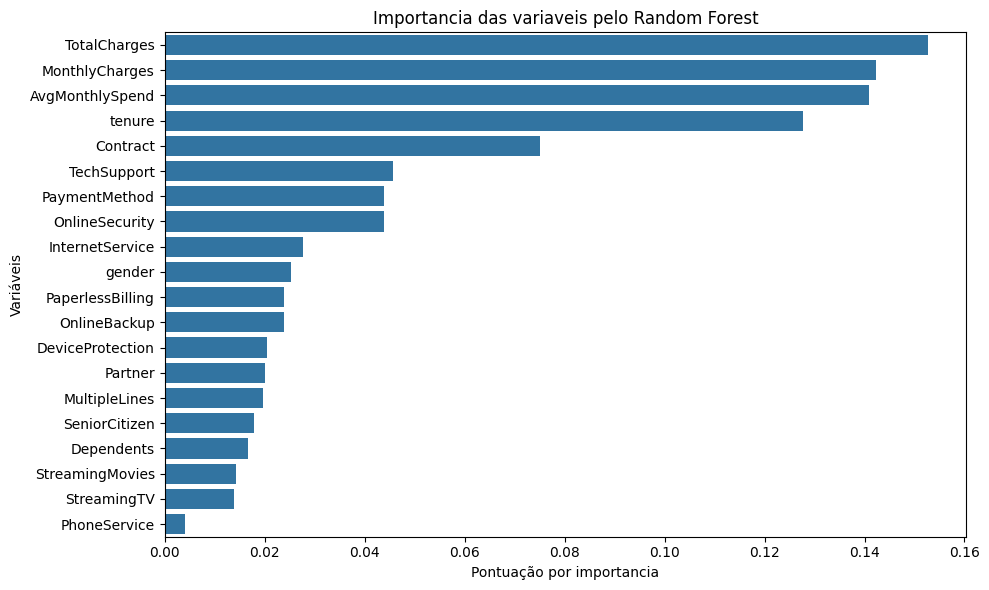

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Importancia das variaveis pelo Random Forest")
plt.xlabel("Pontuação por importancia")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

**💡 Insight :**
> As váriaveis mais significativas pelo Random Forest são o Total gasto pelo cliente durante o tempo de contrato, o valor mensal pago pelos clientes, o tempo que o cliente permaneceu na empresa e o tipo de contrato. As demais variaveis não afetam significativamente se o cliente vai ou não cancelar o contrato.

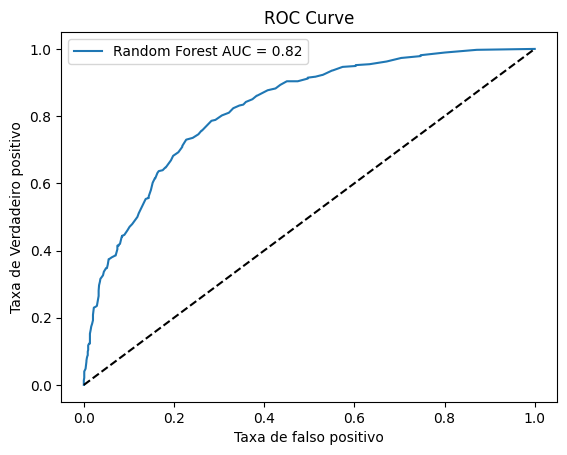

In [28]:
# ROC Curve
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, label=f"Random Forest AUC = {roc_auc_score(y_test, rf_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taxa de falso positivo")
plt.ylabel("Taxa de Verdadeiro positivo")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [29]:
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    )
best_rf.fit(X_train, y_train)
final_preds = best_rf.predict(X_test)


print("Final Accuracy:", accuracy_score(y_test, final_preds))
print("Final Classification Report:\n", classification_report(y_test, final_preds))

Final Accuracy: 0.794180269694819
Final Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [30]:
importances = best_rf.feature_importances_
features = X.columns

In [31]:
categorias = features.tolist()
valores = importances.tolist()

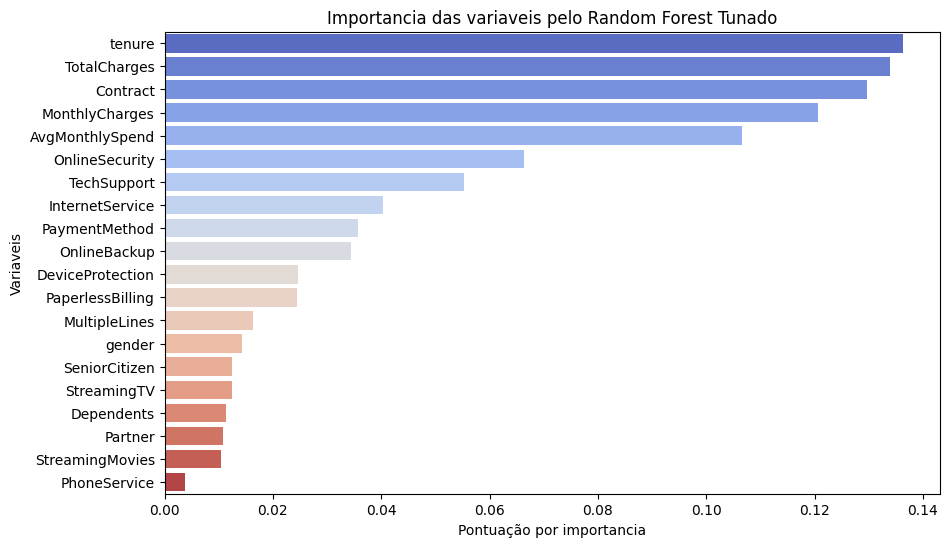

In [39]:
df1 = pd.DataFrame({'categoria': categorias, 'valor': valores})
dados_ordenados = df1.sort_values(by='valor', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data= dados_ordenados, x='valor', y='categoria', palette="coolwarm")
plt.title("Importancia das variaveis pelo Random Forest Tunado")
plt.xlabel("Pontuação por importancia")
plt.ylabel("Variaveis")
plt.show()

**💡 Insight :**
> * ***(Técnico)*** Após descobrir o modelo que apresentou melhor acuracia (Random Forest), executamos o tunning do modelo buscando melhorar sua eficiencia. Em seguida obtivemos uma nova prioridade na importancia das variaveis. A variavel mais importante no novo modelo tunado foi a "Tenure" referente ao tempo que o cliente está em contrato com a empresa seguida do total gasto pelo cliente com a empresa.

> * ***(Geral)*** Fazendo um apanhado geral é possivel concluirmos que o principal desafio dessa empresa é em fidelizar os clientes novos, uma vez que a maior taxa de cancelamento está nos primeiros 10 meses, com clientes que optaram pelo tipo de contrato mensal.

> * Sendo assim, uma possivel solução seria criar campanhas mais chamativas para fazer com que os clientes aderirem os planos anuais, assim tempo contato por mais tempo com os produtos oferecidos e melhorando a fidelidade desse cliente com a emrpesa.

> * Já em relação aos clientes que mesmo com o plano anual chegaram a fazer o cancelamento, seria interessante tentar entender o motivo do cancelamento para providenciar novas estrategias de negocio para os clientes que estão na empresa a mais tempo, eviantando ainda mais a rotatividade dos clientes.



In [40]:
#Salvando o modelo
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("features.pkl", "wb") as f:
    pickle.dump(categorias, f)